In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

### 1. In this exercise, you will investigate the distribution of $S_n = U_1 + U_2 + ... + U_n$ where $U_i$ are i.i.d. $\text{Uniform}(a=0, b=1)$ random variables. You already calculated $E[S_n]$ and $SD[S_n]$ in Lesson 44. Now, you will calculate its distribution

- $E[S_n] = E[U_1 + U_2 ... + U_n] = E[U_1] + E[U_2] + ... E[U_n] = \frac{n}{2}$
- $Var[S_n] = Cov[U_1 + U_2 ... + U_n, U_1 + U_2 ... + U_n] = \sum_{i=j}^n Cov[U_i, U_j] + \sum_{i\neq j}^n Cov[U_i, U_j] = n Var[U_1] = n \cdot \frac{(b-a)^2}{12}$
- Note that this is also called the **Irwin-Hall Distribution**

#### a. Find the p.d.f. of $S_3 = U_1 + U_2 + U_3$ and sketch its graph. Check that this p.d.f. agrees with the value of $E[S_3]$ and $SD[S_3]$ that you calculated earlier. 

#### Hint 1: We already worked out the distribution of $U_1 + U_2$ in example 45.1. Do another convolution. 
#### Hint 2: You should end up with a PDF with 4 cases: $$f_{S_3}(t) = \begin{Bmatrix} ... & 0 \lt t \le 1 \\ ... & 1 \lt t \le 2 \\ ... & 2 \lt t \lt 3 \\ 0 & \text{otherwise} \end{Bmatrix}$$


- We found previously that $S_2$ has the following PDF $$f_{S_2}(t) = \begin{Bmatrix} t & 0 \lt t \lt 1 \\ 2 - t & 1 \lt t \lt 2 \\ 0 & \text{otherwise} \end{Bmatrix}$$

- Let's define the domain on which $U_i$ and $S_2$ and $S_3$ are defined
    - We know that $0 \lt (U_1, U_2, U_3) \lt 1$
    - $S_3 = U_1 + U_2 + U_3$, $0 \lt S_3 \lt 3$
    - $S_2 = U_1 + U_2$, $0 \lt S_2 \lt 2$

- Since $S_2$ and $U_3$ are independent by assumption, $f_{S_3}(t) = \int f_{S_2}(x) \cdot f_{U_3}(t-x) \text{ } dx$

- Since $f_{S_2}(x)$ is a piecewise function, we need to consider the integration across all possible segments

##### When $0 \lt t \le 1$

- Limits
    1. $s_2 > 0$
    2. $U_3 > 0$
        - $t - s_2 > 0$
        - $s_2 \lt t$
    3. $s_2 < 2$
    4. $U_3 < 1$
        - $t - s_2 < 1$
        - $s_2 > t-1$

- Combining limits
    - 1. and 4. together suggests that $s_2 > 0$, because $t-1 < 0$ for $0 \lt t \le 1$, making condition 1 more restrictive than 4
    - 2. and 3. together suggests that $s_2 \lt t$, because $t < 2$ for $0 \lt t \le 1$, making condition 2. more restrictive

- $$\begin{align}
    f_{S_3}(t) &= \int_{s_2=0}^{t} f_{S_2}(s_2) \cdot f_{U_3}(t-s_2) \text{ } ds_2 \\
    &= \int_{s_2=0}^{t} s_2 \cdot 1 \text{ } ds_2 \\
    &= [\frac{s_2^2}{2}]^{t}_0 \\
    &= \frac{t^2}{2} & \text{when } 0 \lt t \lt 1 \\
    \end{align}$$

##### When $1 \lt t \le 2 $

- When $0 \lt s_2 \lt 1$
    - Limits
        1. $s_2 > 0$
        2. $U_3 > 0$
            - $t - s_2 > 0$
            - $s_2 \lt t$
        3. $s_2 < 1$
        4. $U_3 < 1$
            - $t - s_2 < 1$
            - $s_2 > t-1$

    - Combining limits
        - 1. and 4. together suggests that $s_2 > t-1$, because $t-1 > 0$ for $1 \lt t \le 2$, making condition 4 more restrictive than 1
        - 2. and 3. together suggests that $s_2 \lt 1$, because $t > 1$ for $1 \lt t \le 2$, making condition 3. more restrictive
    
    - $$\begin{align}
        f_{S_3}(t) &= \int_{s_2=t-1}^{1} f_{S_2}(s_2) \cdot f_{U_3}(t-s_2) \text{ } ds_2 \\
        &= \int_{s_2=t-1}^{1} s_2 \cdot 1 \text{ } ds_2 \\
        &= [\frac{s_2^2}{2}]^{1}_{t-1} \\
        &= \frac{1}{2} - \frac{(t-1)^2}{2} \\
        &= \frac{1}{2} - [\frac{t^2}{2} - t + \frac{1}{2}] \\
        &= \frac{1}{2} - \frac{t^2}{2} + t - \frac{1}{2} \\
        &= t - \frac{t^2}{2}
        \end{align}$$

- When $1 \lt s_2 \lt 2$
    - Limits
        1. $s_2 > 1$
        2. $U_3 > 0$
            - $t - s_2 > 0$
            - $s_2 \lt t$
        3. $s_2 < 2$
        4. $U_3 < 1$
            - $t - s_2 < 1$
            - $s_2 > t-1$

    - Combining limits
        - 1. and 4. together suggests that $s_2 > 1$, because $t-1 < 1$ when $1 \lt t \le 2$, making condition 1. more restrictive than 4.
        - 2. and 3. together suggests that $s_2 \lt t$, because $t < 2$ for $1 \lt t \le 2$, making condition 2. more restrictive
    
    - $$\begin{align}
        f_{S_3}(t) &= \int_{s_2=1}^{t} f_{S_2}(s_2) \cdot f_{U_3}(t-s_2) \text{ } ds_2 \\
        &= \int_{s_2=1}^{t} (2 - s_2) \cdot 1 \text{ } ds_2 \\
        &= [2s_2 - \frac{s_2^2}{2}]^{t}_{1} \\
        &= [2t - \frac{t^2}{2} - 2 + \frac{1}{2}] \\
        &= [2t - \frac{t^2}{2} - \frac{3}{2}]
        \end{align}$$

- Summing the cases for $1 \lt t \le 2$:
    - $$\begin{align}
        f_{S_3}(t) &= t - \frac{t^2}{2} + 2t - \frac{t^2}{2} - \frac{3}{2} \\
        &= -t^2 + 3t - \frac{3}{2} \\
        &= \frac{1}{2} (-2t^2 + 6t - 3) & \text{when } 1 \lt t \lt 2
        \end{align}$$

##### When $2 \lt t \lt 3$

- Note that t can only be true if $1 \lt s_2 \lt 2$, simply because $U_3$ must be between 0 and 1
- Limits
    1. $s_2 > 1$
    2. $U_3 > 0$
        - $t - s_2 > 0$
        - $s_2 < t$
    3. $s_2 < 2$
    4. $U_3 < 1$
        - $t - s_2 < 1$
        - $s_2 > t-1$
- Combining limits
    - Combining 1. and 4., $s_2 > t-1$
    - Combining 2. and 3., $s_2 < 2$
- $$\begin{align}
    f_{S_3}(t) &= \int_{t-1}^{2} f_{S_2}(s_2) \cdot f_{U_3}(t - s_2) ds_2 \\
    &= \int_{t-1}^{2} (2 - s_2) \cdot 1 ds_2 \\
    &= [2s_2 - \frac{s_2^2}{2}]^{2}_{t-1} \\
    &= 4 - 2 - 2(t-1) + \frac{(t-1)^2}{2} \\ 
    &= 2 - 2t + 2 + \frac{t^2 - 2t + 1}{2} \\
    &= 2 - 2t + 2 + \frac{t^2}{2} - t + \frac{1}{2} \\
    &= \frac{9}{2} - 3t + \frac{t^2}{2} \\
    &= \frac{1}{2} (3^2 - 3 \cdot 2 \cdot t + t^2) \\
    &= \frac{1}{2} (t - 3)^2 & \text{for } 2 \le t \le 3
    \end{align}$$

##### Putting it all together 

$$f_{S_3}(t) = 
    \begin{Bmatrix} 
        \frac{t^2}{2} & 0 \lt t \lt 1 \\
        \frac{1}{2} (-2t^2 + 6t - 3) & 1 \lt t \lt 2 \\
        \frac{1}{2} (t - 3)^2 & 2 \lt t \lt 3 \\
        0 & \text{otherwise}
    \end{Bmatrix}$$

In [8]:
u1 = np.random.uniform(0,1,size=100_000)
u2 = np.random.uniform(0,1,size=100_000)
u3 = np.random.uniform(0,1,size=100_000)
s3 = u1 + u2 + u3
print(np.mean(s3), np.var(s3))
print(3*0.5, 3 * 1 / 12)
# plt.hist(s3);

1.5015351041537468 0.24974698905423803
1.5 0.25


#### b. Find the p.d.f. of $S_4 = U_1 + U_2 + U_3 + U_4$ and sketch its graph. Check that this p.d.f. agrees with the value of $E[S_4]$ and $SD[S_4]$ that you calculated earlier. (Hint: I think the easiest way to do this is to convolve another uniform p.d.f. with the p.d.f. you got in part a. However, you could also do this by convolving two triangle functions together. You should get the same answer either way.)


- Following the logic in section a., $f_{S_4}(t) = \int f_{S_3}(s_3) \cdot f_{U_4}(t - s_3)$. Since $f_{S_3}$ is discontinuous between regions, let's consider every region separately

##### When $0 \lt t \lt 1$

- Limits
    1. $s_3 > 0$
    2. $U_4 > 0$
        - $t - s_3 > 0$
        - $s_3 < t$
    3. $s_3 < 3$
    4. $U_4 < 1$
        - $t - s_3 < 1$
        - $s_3 > t-1$
- Combining
    - 1 and 4 implies $s_3 > 0$
    - 2 and 3 implies $s_3 < t$
- $$\begin{align}
    f_{S_4}(t) &= \int_{s_3 = 0}^{t} f_{S_3}(s_3) \cdot f_{U_4}(t - s_3) ds_3 \\
    &= \int_{s_3 = 0}^{t} \frac{s_3^2}{2} \cdot 1 ds_3 \\
    &= [\frac{s_3^3}{6}]^{t}_{0} \\
    &= \frac{t^3}{6} & \text{when } 0 \lt t \lt 1 
    \end{align}$$

##### When $1 \lt t \lt 2$

- When $0 \lt s_3 \lt 1$
    - Limits
        1. $s_3 > 0$
        2. $U_4 > 0$
            - $t - s_3 > 0$
            - $s_3 < t$
        3. $s_3 < 1$
        4. $U_4 < 1$
            - $t - s_3 < 1$
            - $s_3 > t-1$
    - Combining
        - 1 and 4 implies $s_3 > t-1$
        - 2 and 3 implies $s_3 < 1$
    - $$\begin{align}
        f_{S_4}(t) &= \int_{s_3 = t-1}^{1} f_{S_3}(s_3) \cdot f_{U_4}(t - s_3) ds_3 \\
        &= \int_{s_3 = t-1}^{1} \frac{s_3^2}{2} \cdot 1 \text{ } ds_3 \\
        &= [\frac{s_3^3}{6}]^{1}_{t-1} \\
        &= \frac{1}{6} - \frac{(t-1)^3}{6} \\
        &= \frac{1}{6} (1 - (t^3 - 3t^2 + 3t - 1) ) \\
        &= \frac{1}{6} (2 - t^3 + 3t^2 - 3t) \\
        \end{align}$$
- When $1 \lt s_3 \lt 2$
    - Limits
        1. $s_3 > 1$
        2. $U_4 > 0$
            - $t - s_3 > 0$
            - $s_3 < t$
        3. $s_3 < 2$
        4. $U_4 < 1$
            - $t - s_3 < 1$
            - $s_3 > t-1$
    - Combining
        - 1 and 4 implies $s_3 > 1$
        - 2 and 3 implies $s_3 < t$
    - $$\begin{align}
        f_{S_4}(t) &= \int_{s_3 = 1}^{t} f_{S_3}(s_3) \cdot f_{U_4}(t - s_3) ds_3 \\
        &= \int_{s_3 = 1}^{t} \frac{1}{2} (-2s_3^2 + 6s_3 - 3) ds_3 \\
        &= \frac{1}{2} \int_{s_3 = 1}^{t} -2s_3^2 + 6s_3 - 3 ds_3 \\
        &= \frac{1}{2} [-\frac{2}{3}s_3^3 + 3s_3^2 - 3s_3]^{t}_{1} \\
        &= \frac{1}{6} [-2s_3^3 + 9s_3^2 - 9s_3]^{t}_{1} \\
        &= \frac{1}{6} [-2t^3 + 9t^2 - 9t + 2 - 9 + 9] \\
        &= \frac{1}{6} [-2t^3 + 9t^2 - 9t + 2] \\
        \end{align}$$

- Summing the cases when $0 \lt s_3 \lt 1$ and $1 \lt s_3 \lt 2$
    - $$\begin{align}
        f_{S_4}(t) &= \frac{1}{6} [-2t^3 + 9t^2 - 9t + 2] + \frac{1}{6} (2 - t^3 + 3t^2 - 3t) \\
        &= \frac{1}{6} (-2t^3 + 9t^2 - 9t + 2 + 2 - t^3 + 3t^2 - 3t) \\
        &= \frac{1}{6} (-3t^3 + 12 t^2 - 12t + 4) & \text{when } 1 \lt t \lt 2
        \end{align}$$

##### When $2 \lt t \lt 3$

- When $1 \lt s_3 \lt 2$
    - Limits
        1. $s_3 > 1$
        2. $U_4 > 0$
            - $t - s_3 > 0$
            - $s_3 < t$
        3. $s_3 < 2$
        4. $U_4 < 1$
            - $t - s_3 < 1$
            - $s_3 > t-1$
    - Combining
        - 1 and 4 implies $s_3 > t-1$
        - 2 and 3 implies $s_3 < 2$
    - $$\begin{align}
        f_{S_4}(t) &= \int_{s_3 = t-1}^{2} f_{S_3}(s_3) \cdot f_{U_4}(t - s_3) ds_3 \\
        &= \int_{s_3 = t-1}^{2} \frac{1}{2} (-2s_3^2 + 6s_3 - 3) ds_3 \\
        &= \frac{1}{2} \int_{s_3 = t-1}^{2} (-2s_3^2 + 6s_3 - 3) ds_3 \\
        &= \frac{1}{2} [-\frac{2}{3}s_3^3 + 3s_3^2 - 3s_3]^{2}_{t-1} \\
        &= \frac{1}{6} [-2s_3^3 + 9s_3^2 - 9s_3]^{2}_{t-1} \\
        &= \frac{1}{6} [-16 + 36 - 18 - (-2(t-1)^3 + 9(t-1)^2 - 9(t-1))] \\
        &= \frac{1}{6} [-16 + 36 - 18 + 2(t-1)^3 - 9(t-1)^2 + 9(t-1)] \\
        &= \frac{1}{6} [-16 + 36 - 18 + 2(t^3 - 3t^2 + 3t - 1) - 9(t^2 - 2t + 1) + 9(t-1)] \\
        &= \frac{1}{6} [-16 + 36 - 18 + 2t^3 - 6t^2 + 6t - 2 - 9t^2 + 18t - 9 + 9t - 9] \\
        &= \frac{1}{6} [2t^3 - 15t^2 + 33t - 18] \\
        \end{align}$$

- When $2 \lt s_3 \lt 3$
    - Limits
        1. $s_3 > 2$
        2. $U_4 > 0$
            - $t - s_3 > 0$
            - $s_3 < t$
        3. $s_3 < 3$
        4. $U_4 < 1$
            - $t - s_3 < 1$
            - $s_3 > t-1$
    - Combining
        - 1 and 4 implies $s_3 > 2$
        - 2 and 3 implies $s_3 < t$
    - $$\begin{align}
        f_{S_4}(t) &= \int_{s_3 = 2}^{t} f_{S_3}(s_3) \cdot f_{U_4}(t - s_3) ds_3 \\
        &= \int_{s_3 = 2}^{t} \frac{1}{2} (s_3 - 3)^2 ds_3 \\
        &= \frac{1}{2} \int_{s_3 = 2}^{t} s_3^2 - 6s_3 + 9 ds_3 \\
        &= \frac{1}{2} [\frac{1}{3} s_3^3 - 3s_3^2 + 9s_3]^{t}_{2}  \\
        &= \frac{1}{6} [s_3^3 - 9s_3^2 + 27s_3]^{t}_{2}  \\
        &= \frac{1}{6} [t^3 - 9t^2 + 27t - 8 + 36 - 54]  \\
        &= \frac{1}{6} [t^3 - 9t^2 + 27t - 26]  \\
        \end{align}$$

- Summing the cases when $0 \lt s_3 \lt 1$ and $1 \lt s_3 \lt 2$
    - $$\begin{align}
        f_{S_4}(t) &= \frac{1}{6} [2t^3 - 15t^2 + 33t - 18] + \frac{1}{6} [t^3 - 9t^2 + 27t - 26] \\
        &= \frac{1}{6} (3t^3 - 24t^2 + 60t - 44) & \text{when } 2 \lt t \lt 3 \\
        \end{align}$$

##### When $3 \lt t \lt 4$

- For $3 \lt t \lt 4$, $2 \lt s_3 \lt 3$ because $0 \lt U_4 \lt 1$

- Limits
    1. $s_3 > 2$
    2. $U_4 > 0$
        - $t - s_3 > 0$
        - $s_3 < t$
    3. $s_3 < 3$
    4. $U_4 < 1$
        - $t - s_3 < 1$
        - $s_3 > t-1$
- Combining
    - 1. and 4. implies $s_3 > t-1$
    - 2. and 3. implies $s_3 < 3$

$$\begin{align}
    f_{S_4}(t) &= \int_{s_3=t-1}^{3} f_{S_3}(s_3) \cdot f_{U_4}(t - s_3) d s_3 \\
    &= \int_{s_3=t-1}^{3} \frac{1}{2} (s_3 - 3)^2 d s_3 \\
    &= \frac{1}{2} \int_{s_3=t-1}^{3} s_3^2 - 6s_3 + 9 d s_3 \\
    &= \frac{1}{2} [\frac{1}{3} s_3^3 - 3s_3^2 + 9s_3]_{t-1}^{3} \\
    &= \frac{1}{6} [s_3^3 - 9s_3^2 + 27s_3]_{t-1}^{3} \\
    &= \frac{1}{6} [(27 - 81 + 81) - ((t-1)^3 - 9(t-1)^2 + 27(t-1))] \\
    &= \frac{1}{6} [27 - (t^3 - 3t^2 + 3t - 1 - 9(t^2 - 2t + 1) + 27(t-1))] \\
    &= \frac{1}{6} [27 - (t^3 - 3t^2 + 3t - 1 - 9t^2 + 18t - 9 + 27t - 27)] \\
    &= \frac{1}{6} [27 - t^3 + 3t^2 - 3t + 1 + 9t^2 - 18t + 9 - 27t + 27] \\
    &= \frac{1}{6} [64 - t^3 + 12t^2 - 48t] \\
    &= \frac{1}{6} [(4-t)^3] & \text{when } 3 \lt t \lt 4 
\end{align}$$

##### Putting together

$$\begin{align} 
    f_{S_4}(t) = 
        \begin{Bmatrix} 
            \frac{t^3}{6} & \text{when } 0 \lt t \lt 1 \\
            \frac{1}{6} (-3t^3 + 12 t^2 - 12t + 4) & \text{when } 1 \lt t \lt 2 \\
            \frac{1}{6} (3t^3 - 24t^2 + 60t - 44) & \text{when } 2 \lt t \lt 3 \\
            \frac{1}{6} [(4-t)^3] & \text{when } 3 \lt t \lt 4 
        \end{Bmatrix}
\end{align}$$

1.9986892797455194 0.3322717828918021
2.0 0.3333333333333333


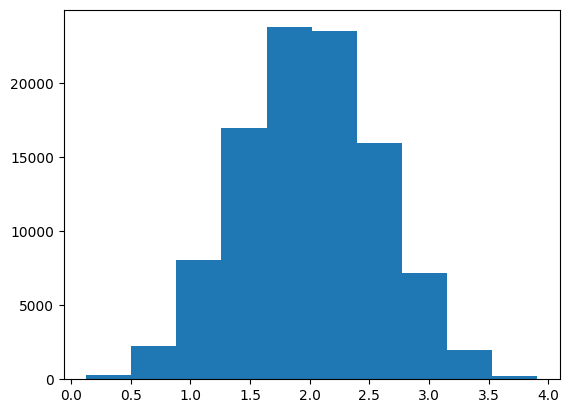

In [12]:
u1 = np.random.uniform(0,1,size=100_000)
u2 = np.random.uniform(0,1,size=100_000)
u3 = np.random.uniform(0,1,size=100_000)
u4 = np.random.uniform(0,1,size=100_000)
s4 = u1 + u2 + u3 + u4
print(np.mean(s4), np.var(s4))
print(4*0.5, 4 * 1 / 12)
plt.hist(s3);

#### c. Neither $S_3$ nor $S_4$ are named distributions. However, if you sketch their p.d.f.s, they should remind you of one of the named distributions we learned. Which one?

- They approximate a normal distribution

### 2. Let X and Y be independent standard normal—that is, $\text{Normal}(\mu=0, \sigma=1)$ random variables. Let $T = X+Y$. You should quickly be able to determine $E[T]$ and $Var[T]$. But what is the distribution of T? Use convolution to answer this question. (I’m happy if you can just set up the integral and plug it into Wolfram Alpha. If you really want to solve it by hand, try “completing the square” in the exponent so that you end up with something that looks like a normal p.d.f., which you know must integrate to 1.)


- $E[T] = E[X] + E[Y] = 0$
- $Var[T] = Cov[T, T] = Cov[X+Y, X+Y] = Cov[X,X] + 2Cov[X,Y] + Cov[Y,Y] = Var[X] + Var[Y] = 2$

- $f_X(x) = \frac{1}{\sqrt{2\pi} \sigma_x} e^{-0.5 \cdot (\frac{x - \mu_x}{\sigma_x})^2}$
- $f_Y(y) = \frac{1}{\sqrt{2\pi} \sigma_y} e^{-0.5 \cdot (\frac{y - \mu_y}{\sigma_y})^2}$

$$\begin{align}
    f_T(t) &= \int_{x} f_X(x) \cdot f_Y(t-x) \\
    &= \int_{x} \frac{1}{\sqrt{2\pi} \sigma_x} e^{-\frac{1}{2} (\frac{x-\mu_x}{\sigma_x})^2} \cdot \frac{1}{\sqrt{2\pi} \sigma_y} e^{-\frac{1}{2} (\frac{t - x -\mu_y}{\sigma_y})^2} \\
    &= \frac{1}{2\pi \sigma_x \sigma_y} \int_{x} e^{-\frac{1}{2} (\frac{x-\mu_x}{\sigma_x})^2} \cdot e^{-\frac{1}{2} (\frac{t - x -\mu_y}{\sigma_y})^2} \\
    &= \frac{1}{2\pi \sigma_x \sigma_y} \int_{x} e^{-\frac{1}{2} [ (\frac{x-\mu_x}{\sigma_x})^2 + (\frac{t - x -\mu_y}{\sigma_y})^2 ] }  \\
    &= \frac{1}{2\pi \sigma_x \sigma_y} \int_{x} e^{ - [ \frac{\sigma_y^2 (x-\mu_x)^2 + \sigma_x^2 (t - x - \mu_y)^2}{2 \sigma_x^2 \sigma_y^2} ] }  \\
\end{align}$$

- For simplicity, let's focus on the exponent term.

$$\begin{align}
    \frac{\sigma_y^2 (x-\mu_x)^2 + \sigma_x^2 (t - x - \mu_y)^2}{2 \sigma_x^2 \sigma_y^2} &= \frac{\sigma_y^2 (x-\mu_x)^2 + \sigma_x^2 (t - x - \mu_y)^2}{2 \sigma_x^2 \sigma_y^2} \\
    &= \frac{\sigma_y^2 x^2 - 2x\mu_x \sigma_y^2 + \mu_x^2 \sigma_y^2 + \sigma_x^2 t^2 - \sigma_x^2 tx - \sigma_x^2 t\mu_y - \sigma_x^2 tx + \sigma_x^2 x^2 + \sigma_x^2 x\mu_y - \sigma_x^2 t\mu_y + \sigma_x^2 x\mu_y + \sigma_x^2 \mu_y^2}{2 \sigma_x^2 \sigma_y^2} \\
    &= \frac{(\sigma_y^2 x^2 + \sigma_x^2 x^2) + (- 2x\mu_x \sigma_y^2 - \sigma_x^2 tx - \sigma_x^2 tx + \sigma_x^2 x\mu_y + \sigma_x^2 x\mu_y) + (\sigma_x^2 t^2 - \sigma_x^2 t\mu_y - \sigma_x^2 t\mu_y + \sigma_x^2 \mu_y^2) + \mu_x^2 \sigma_y^2}{2 \sigma_x^2 \sigma_y^2} \\
    &= \frac{x^2 (\sigma_y^2 + \sigma_x^2) - 2x(\mu_x \sigma_y^2 + \sigma_x^2 t - \sigma_x^2 \mu_y) + \sigma_x^2 (t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2}{2 \sigma_x^2 \sigma_y^2} \\
    &= \frac{x^2 (\sigma_y^2 + \sigma_x^2) - 2x(\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2) + \sigma_x^2 (t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2}{2 \sigma_x^2 \sigma_y^2} \cdot \frac{\frac{1}{\sigma_z^2}}{\frac{1}{\sigma_z^2}} & \sigma_z = \sqrt{\sigma_x^2 + \sigma_y^2} \\
    &= \frac{x^2 - 2x \frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2} + \frac{\sigma_x^2 (t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2}{\sigma_z^2}}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}} \\
    &= \frac{x^2 - 2x \frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2} + (\frac{\mu_x \sigma_y^2 + \sigma_x^2 t - \sigma_x^2 \mu_y}{\sigma_z^2})^2 - (\frac{\mu_x \sigma_y^2 + \sigma_x^2 t - \sigma_x^2 \mu_y}{\sigma_z^2})^2 + \frac{\sigma_x^2 (t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2}{\sigma_z^2}}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}} \\
    &= \frac{(x - \frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2 - (\frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2 + \frac{\sigma_x^2 (t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2}{\sigma_z^2}}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}} \\
    &= \frac{(x - \frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}} - \frac{(\frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2 + \frac{\sigma_x^2 (t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2}{\sigma_z^2}}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}}
\end{align}$$

- Once more, simplifying notation, let's focus on the second term in the sum above. Remember that $\sigma_z^2 = \sigma_x^2 + \sigma_y^2$

$$\begin{align}
    \frac{-(\frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2 + \frac{\sigma_x^2 (t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2}{\sigma_z^2}}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}} 
    &= \frac{-(\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2)^2 + \sigma_z^2 \sigma_x^2 (t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2 \sigma_z^2}{2 \sigma_x^2 \sigma_y^2 \sigma_z^2} \\
    &= \frac{-\sigma_x^4 (t^2 - 2t\mu_y + \mu_y^2) - 2 \mu_x \sigma_y^2 \sigma_x^2 (t - \mu_y) - \mu_x^2 \sigma_y^4 + (\sigma_x^2 + \sigma_y^2) \sigma_x^2 (t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2 (\sigma_x^2 + \sigma_y^2)}{2 \sigma_x^2 \sigma_y^2 \sigma_z^2} \\
    &= \frac{-\sigma_x^4 t^2 + \sigma_x^4 2t\mu_y - \sigma_x^4 \mu_y^2 - 2 \mu_x \sigma_y^2 \sigma_x^2 t + 2 \mu_x \sigma_y^2 \sigma_x^2 \mu_y - \mu_x^2 \sigma_y^4 + (\sigma_x^4 + \sigma_x^2 \sigma_y^2)(t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2 \sigma_x^2 + \mu_x^2 \sigma_y^4}{2 \sigma_x^2 \sigma_y^2 \sigma_z^2} \\
    &= \frac{-\sigma_x^4 t^2 + \sigma_x^4 2t\mu_y - \sigma_x^4 \mu_y^2 - 2 \mu_x \sigma_y^2 \sigma_x^2 t + 2 \mu_x \sigma_y^2 \sigma_x^2 \mu_y - \mu_x^2 \sigma_y^4 + \sigma_x^4 t^2 - \sigma_x^4 2t \mu_y + \sigma_x^4 \mu_y^2  + \sigma_x^2 \sigma_y^2 t^2 - 2t\mu_y \sigma_x^2 \sigma_y^2 + \sigma_x^2 \sigma_y^2 \mu_y^2 + \mu_x^2 \sigma_y^2 \sigma_x^2 + \mu_x^2 \sigma_y^4}{2 \sigma_x^2 \sigma_y^2 \sigma_z^2} \\
    &= \frac{- 2 \mu_x \sigma_y^2 \sigma_x^2 t + 2 \mu_x \sigma_y^2 \sigma_x^2 \mu_y + \sigma_x^2 \sigma_y^2 t^2 - 2t\mu_y \sigma_x^2 \sigma_y^2 + \sigma_x^2 \sigma_y^2 \mu_y^2 + \mu_x^2 \sigma_y^2 \sigma_x^2}{2 \sigma_x^2 \sigma_y^2 \sigma_z^2} \\
    &= \frac{- 2 \mu_x t + 2 \mu_x \mu_y + t^2 - 2t\mu_y + \mu_y^2 + \mu_x^2}{2 \sigma_z^2} \\
    &= \frac{t^2 - 2 t (\mu_x + \mu_y) + (\mu_y^2 + 2 \mu_x \mu_y + \mu_x^2)}{2 \sigma_z^2} \\
    &= \frac{t^2 - 2 t (\mu_x + \mu_y) + (\mu_x + \mu_y)^2}{2 \sigma_z^2} \\
    &= \frac{(t - (\mu_x + \mu_y))^2}{2 \sigma_z^2} \\
\end{align}$$

- Substituting this, we find that:

$$\begin{align}
    \frac{\sigma_y^2 (x-\mu_x)^2 + \sigma_x^2 (t - x - \mu_y)^2}{2 \sigma_x^2 \sigma_y^2} 
    &= \frac{(x - \frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}} - \frac{(\frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2 + \frac{\sigma_x^2 (t^2 - 2t\mu_y + \mu_y^2) + \mu_x^2 \sigma_y^2}{\sigma_z^2}}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}} \\
     &= \frac{(x - \frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}} - \frac{(t - (\mu_x + \mu_y))^2}{2 \sigma_z^2} \\
\end{align}$$

- This suggests that

$$\begin{align}
    f_T(t) &= \int_{x} f_X(x) \cdot f_Y(t-x) \\
    &= \frac{1}{2\pi \sigma_x \sigma_y} \int_{x} e^{ - [ \frac{\sigma_y^2 (x-\mu_x)^2 + \sigma_x^2 (t - x - \mu_y)^2}{2 \sigma_x^2 \sigma_y^2} ] }  \\
    &= \frac{1}{2\pi \sigma_x \sigma_y} \int_{x} e^{ - [ \frac{(x - \frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}} - \frac{(t - (\mu_x + \mu_y))^2}{2 \sigma_z^2} ] } \\
    &= \frac{1}{\sqrt{2\pi} \sigma_z} \frac{1}{\sqrt{2\pi} \frac{\sigma_x \sigma_y}{\sigma_z}} \int_{x} e^{ - \frac{(x - \frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}}} \cdot e^{- \frac{(t - (\mu_x + \mu_y))^2}{2 \sigma_z^2}} \\
    &= \frac{1}{\sqrt{2\pi} \sigma_z} e^{- \frac{(t - (\mu_x + \mu_y))^2}{2 \sigma_z^2}} \int_{x} \frac{1}{\sqrt{2\pi} \frac{\sigma_x \sigma_y}{\sigma_z}} e^{ - \frac{(x - \frac{\sigma_x^2 (t - \mu_y) + \mu_x \sigma_y^2}{\sigma_z^2})^2}{2 \frac{\sigma_x^2 \sigma_y^2}{\sigma_z^2}}} & \text{integral of this is a normal PDF, so it is just 1} \\
    &= \frac{1}{\sqrt{2\pi} \sigma_z} e^{- \frac{(t - (\mu_x + \mu_y))^2}{2 \sigma_z^2}}
\end{align}$$

- The sum of 2 normal PDFs is just another normal PDF
    - The expectation of the new PDF is $\mu_x + \mu_y$
    - The variance of the new PDF is $\sigma_z^2 = \sigma_x^2 + \sigma_y^2$

### 3. (This exercise is an application of the result that you found in the previous exercise. It is otherwise unrelated to this lesson.) Let $X_1$, $X_2$, $X_3$ represent the times (in minutes) necessary to perform three successive repair tasks at a service facility. They are independent, normal random variables with expected values 45, 50, and 75 and variances 10, 12, and 14, respectively. What is the probability that the service facility is able to finish all three tasks within 3 hours (that is, 180 minutes)? (Hint: Use the previous exercise to identify the distribution of $T = X_1 + X_2 + X_3$. It is one of the named distributions we learned. Once you identify the distribution and its parameters, you can calculate the probability in the usual way. You should not need to do any convolutions to answer this question.)

- T = X + Y + Z is normal
    - $E[T] = \mu_t = 45 + 50 + 75 = 170$ 
    - $Var[T] = \sigma_t^2 = 10 + 12 + 14 = 36$ 
        - $SD[T] = \sqrt{36} = 6$

- Since $T \sim \text{Normal}(170, 36)$
    - $P(T < 180) = P(Z < 1.67) = 0.952\%$

In [7]:
import scipy
scipy.stats.norm.cdf(1.6667)

0.9522129635397043